##DL_HW1_60201561_김아영



In [ ]:
# DL_HW1_60201561_김아영

##1. MNIST data를 Logistic Regression으로 classification
- 1000 epoch 단위로 train / test accuracy 출력

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import metrics
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [ ]:
x_data=mnist.data
y_data=mnist.target.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)

x_train, x_test=torch.Tensor(x_train.values), torch.Tensor(x_test.values)
y_train, y_test=torch.Tensor(y_train.values), torch.Tensor(y_test.values)

x_train=x_train.to(device)
x_test=x_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

torch.Size([56000, 784]) torch.Size([56000]) torch.Size([14000, 784]) torch.Size([14000])


In [ ]:
class LogisticRegression(torch.nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegression, self).__init__()
    self.linear=torch.nn.Linear(input_dim, output_dim)

  def forward(self, x):
    outputs=torch.sigmoid(self.linear(x))
    return outputs

In [ ]:
#hyper parameters
epochs=10000
log_interval=10
input_dim=784
output_dim=10
lr=0.01

model=LogisticRegression(input_dim, output_dim)
model=model.to(device)
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

train_loss_arr=[]
test_loss_arr=[]

for i in range(epochs+1):
  #train
  model.train()
  optimizer.zero_grad()
  train_output=model(x_train)
  train_loss=criterion(train_output, y_train.long())
  train_loss.backward()
  optimizer.step()

  if (i%10==0):
    #test
    #10 epoch 마다 loss 저장
    model.eval()
    _, train_pred=torch.max(train_output.data, axis=1)
    with torch.no_grad():
      test_output=model(x_test)
      _, test_pred=torch.max(test_output.data, axis=1)
      test_loss=criterion(test_output, y_test.long())

      train_loss_arr.append(train_loss.data)
      test_loss_arr.append(test_loss.data)

  if(i%1000==0): #1000 epoch마다 출력
    print("=====")
    print("epoch ", i)
    print("loss", train_loss.data, test_loss.data)
    print("train_accuracy {:.03f}".format(float((train_pred==y_train).sum())/y_train.size(0)))
    print("test_accuracy {:.03f}".format(float((test_pred==y_test).sum())/y_test.size(0)))


=====
epoch  0
loss tensor(2.3970, device='cuda:0') tensor(2.3026, device='cuda:0')
train_accuracy 0.087
test_accuracy 0.115
=====
epoch  1000
loss tensor(1.5615, device='cuda:0') tensor(1.5704, device='cuda:0')
train_accuracy 0.886
test_accuracy 0.881
=====
epoch  2000
loss tensor(1.5522, device='cuda:0') tensor(1.5644, device='cuda:0')
train_accuracy 0.894
test_accuracy 0.889
=====
epoch  3000
loss tensor(1.5485, device='cuda:0') tensor(1.5617, device='cuda:0')
train_accuracy 0.898
test_accuracy 0.893
=====
epoch  4000
loss tensor(1.5480, device='cuda:0') tensor(1.5607, device='cuda:0')
train_accuracy 0.900
test_accuracy 0.895
=====
epoch  5000
loss tensor(1.5443, device='cuda:0') tensor(1.5602, device='cuda:0')
train_accuracy 0.902
test_accuracy 0.894
=====
epoch  6000
loss tensor(1.5434, device='cuda:0') tensor(1.5595, device='cuda:0')
train_accuracy 0.903
test_accuracy 0.897
=====
epoch  7000
loss tensor(1.5428, device='cuda:0') tensor(1.5588, device='cuda:0')
train_accuracy 0.903

- 10 epoch마다 train, test data의 loss를 기록하여 plot

In [ ]:
import matplotlib.pyplot as plt

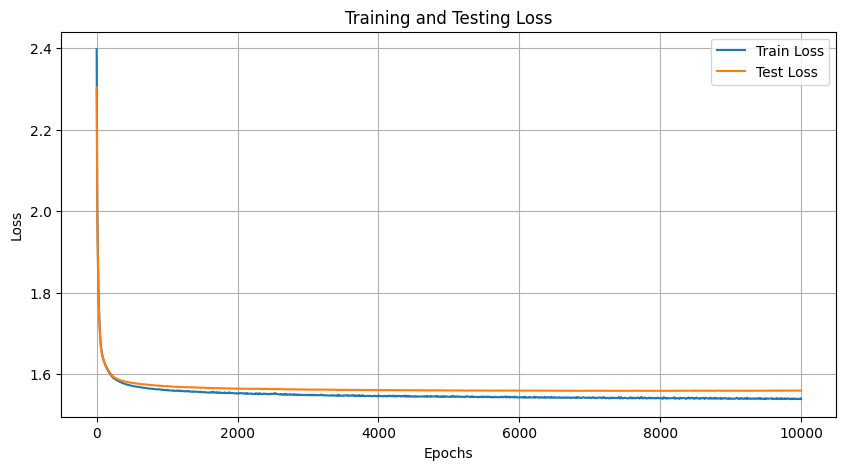

In [ ]:
# Move tensors to CPU for plotting
train_loss_arr_cpu = [loss.cpu().item() for loss in train_loss_arr]
test_loss_arr_cpu = [loss.cpu().item() for loss in test_loss_arr]

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(range(0, epochs+1, log_interval), train_loss_arr_cpu, label='Train Loss')
plt.plot(range(0, epochs+1, log_interval), test_loss_arr_cpu, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.grid(True)
plt.show()


###2. Accuracy를 올리기 위해서 무엇을 추가할 수 있는가?

Accuracy를 올리기 위해서 로지스틱 회귀보다 더 복잡한 모델을 사용하여 데이터의 더 다양한 패턴을 학습할 수 있습니다.

예를 들어, 다층 퍼셉트론(MLP)을 사용할 수 있습니다.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms

# Fetching MNIST dataset
mnist = fetch_openml('mnist_784')

x_data = mnist.data
y_data = mnist.target.astype(int)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)

x_train, x_test = torch.Tensor(x_train.values), torch.Tensor(x_test.values)
y_train, y_test = torch.Tensor(y_train.values), torch.Tensor(y_test.values)

x_train, x_test = x_train.to(device), x_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Define transformations for data augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize data
])

# Load the MNIST dataset with normalization
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader for batching and shuffling data
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Improved MLP Model
class ImprovedMLP(torch.nn.Module):
    def __init__(self):
        super(ImprovedMLP, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 512)
        self.fc2 = torch.nn.Linear(512, 256)
        self.fc3 = torch.nn.Linear(256, 10)
        self.dropout = torch.nn.Dropout(0.5)  # Dropout layer to prevent overfitting

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.softmax(self.fc3(x), dim=1)
        return x

# Hyperparameters
lr = 0.001
epochs = 10000

# Model Initialization
model = ImprovedMLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_loss_arr = []
test_loss_arr = []

for i in range(epochs+1):
  #train
  model.train()
  optimizer.zero_grad()
  train_output=model(x_train)
  train_loss=criterion(train_output, y_train.long())
  train_loss.backward()
  optimizer.step()

  if (i%10==0):
    #test
    #10 epoch 마다 loss 저장
    model.eval()
    _, train_pred=torch.max(train_output.data, axis=1)
    with torch.no_grad():
      test_output=model(x_test)
      _, test_pred=torch.max(test_output.data, axis=1)
      test_loss=criterion(test_output, y_test.long())

      train_loss_arr.append(train_loss.data)
      test_loss_arr.append(test_loss.data)

  if(i%1000==0): #1000 epoch마다 출력
    print("=====")
    print("epoch ", i)
    print("loss", train_loss.data, test_loss.data)
    print("train_accuracy {:.03f}".format(float((train_pred==y_train).sum())/y_train.size(0)))
    print("test_accuracy {:.03f}".format(float((test_pred==y_test).sum())/y_test.size(0)))